# CNN with Keras for Humb back Whale
### (Anezka Kolaceke in kaggle)

## 1. Import libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import zipfile as zf
import os
import csv
import gc
import operator
import random
from sklearn.cross_validation import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from random import shuffle
from IPython.display import Image
from pathlib import Path

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
import keras.backend as K
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


## 2. Data load
### 2.1 train.csv

In [5]:
trainData = pd.read_csv("C:\Python\Whale/train.csv")

In [6]:
trainData.sample(5)

,Image,Id
21541,d88b44430.jpg,w_990921b
793,07dcacfe6.jpg,w_6cda039
7653,4d8da1776.jpg,new_whale
8566,56cc88e19.jpg,new_whale
19445,c407db8df.jpg,w_7342df0


### 2.2 Image files

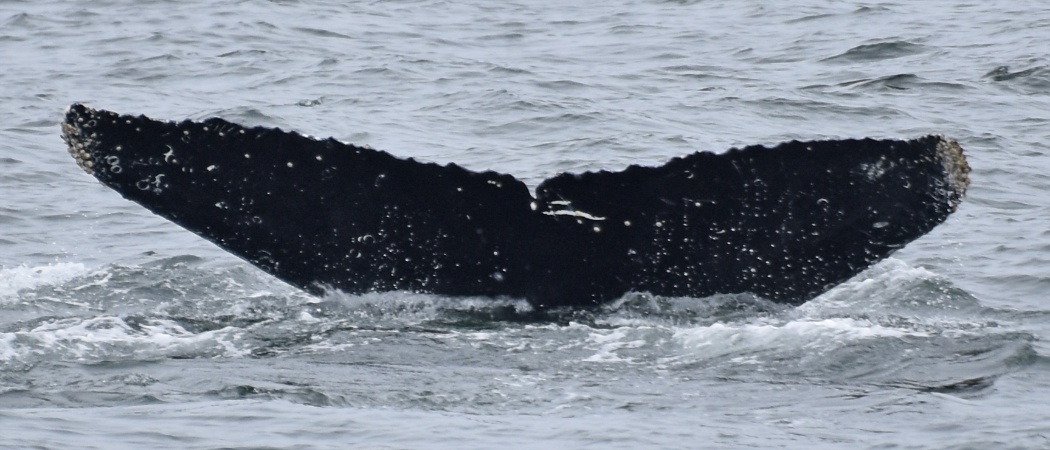

In [7]:
Image(filename = "C:\Python\Whale/train/" + random.choice(trainData['Image']))

## 3. Data preprocessing
### 3.1 Image file
##### change their shape and converts them into an array

In [33]:
def prepareImages(data, m, dataset):
    
    print("Preparing images")
    
    X_train = np.zeros((m, 100, 100, 3))
     
    count = 0
    
    for fig in data['Image']:
        
        img = image.load_img("C:\Python\Whale/" + dataset + "/" + fig, target_size = (100, 100, 3))
        
        x = image.img_to_array(img)
        
        x = preprocess_input(x)
        X_train[count] = x
        if (count%200 == 0):
            print("Processing image: ", count+1, ",", fig)
        count += 1
            
    count = 0
    
    print("Finished")
    
    return X_train

### 3.2 Label
##### change them into one-hot vectors.

In [34]:
def prepareY(Y):
    
    values = array(Y)
    print(values.shape)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)
    
    y = onehot_encoded
    print(y.shape)
    return y, label_encoder

#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

## 4. CNN architecture

In [49]:
mod = Sequential()

mod.add(Conv2D(32, (7, 7), strides=(1, 1), name='conv0', input_shape=(100, 100, 3)))
mod.add(BatchNormalization(axis=3, name='bn0'))
mod.add(Activation('relu'))

mod.add(MaxPooling2D((2, 2), name='max_pool'))

mod.add(Conv2D(64, (3, 3), strides=(1, 1), name='conv1'))
mod.add(Activation('relu'))

mod.add(AveragePooling2D((3, 3), name='avg_pool'))

mod.add(Flatten())
mod.add(Dense(500, activation='relu', name='rl'))
mod.add(Dropout(0.8))
mod.add(Dense(5005, activation='softmax', name='sm'))

print(mod.output_shape)

#opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsiplon=None, decay=0.0, amsgrad=False)

mod.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

(None, 5005)


## 5. Preparing data
### 5.1 Preparing image data X

In [40]:
X = prepareImages(trainData, 25361, "train")

Preparing images
Processing image:  1 , 0000e88ab.jpg
Processing image:  201 , 01f58bda4.jpg
Processing image:  401 , 03f1f348e.jpg
Processing image:  601 , 05ed57e10.jpg
Processing image:  801 , 07ed57a03.jpg
Processing image:  1001 , 09cacb84d.jpg
Processing image:  1201 , 0be63cacd.jpg
Processing image:  1401 , 0dee1a910.jpg
Processing image:  1601 , 100f10498.jpg
Processing image:  1801 , 1226da218.jpg
Processing image:  2001 , 141b56a1a.jpg
Processing image:  2201 , 166a9e05d.jpg
Processing image:  2401 , 18a35d725.jpg
Processing image:  2601 , 1a9c5c970.jpg
Processing image:  2801 , 1cc6aa274.jpg
Processing image:  3001 , 1ec170983.jpg
Processing image:  3201 , 20dee8ffe.jpg
Processing image:  3401 , 2312b9966.jpg
Processing image:  3601 , 24f498675.jpg
Processing image:  3801 , 26ffff900.jpg
Processing image:  4001 , 29163ad0b.jpg
Processing image:  4201 , 2b3a4a5d9.jpg
Processing image:  4401 , 2d196a5fa.jpg
Processing image:  4601 , 2f0e2eb7e.jpg
Processing image:  4801 , 3121

In [41]:
X /= 255

print("Shape of X_train: ", X.shape)

Shape of X_train:  (25361, 100, 100, 3)


### 5.2 Preparing label data Y

In [32]:
print("shape of Y_train: ", trainData['Id'].shape)

Y, label_encoder = prepareY(trainData['Id'])


#The next lines are used for testing - not necessary for the code
#labels = trainData['Id'].unique()
#print("Labels in data set: ", labels.shape)
#labelsTrain = Y.unique()
#print("Labels in training set: ", labelsTrain.shape)

shape of Y_train:  (25361,)
(25361,)
[4786 3808  662 ... 3671 3103    0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(25361, 5005)


## 6. Train

In [ ]:
history = mod.fit(X, Y, epochs = 100, batch_size=32, verbose=1)
gc.collect()